In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving results.csv to results (3).csv
User uploaded file "results.csv" with length 4757 bytes


In [33]:
df = pd.read_csv('results (3).csv')

In [34]:
df.head()

,grupo,AUC,accuracy,precision,recall,sd_AUC,sd_accuracy,sd_precision,sd_recall
0,propios,0.640,0.607,0.599,0.542,0.030,0.021,0.025,0.030
1,propios,0.644,0.610,0.599,0.520,0.037,0.027,0.040,0.018
2,propios,0.628,0.577,0.551,0.662,0.034,0.024,0.025,0.085
3,propios,0.603,0.540,0.513,0.756,0.046,0.035,0.024,0.095
4,propios,0.629,0.598,0.587,0.532,0.021,0.021,0.023,0.041


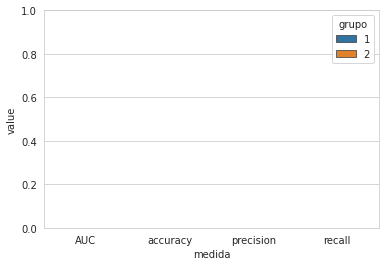

In [58]:
df[['grupo',	'AUC',	'accuracy',	'precision',	'recall']].set_index('grupo', append=True).stack().to_frame().reset_index().rename(columns={'level_2': 'medida', 0: 'value'}).drop('level_0', axis='columns').pipe((sns.boxplot, 'data'), x='medida', y='value', hue='grupo', hue_order=[1, 2]) 

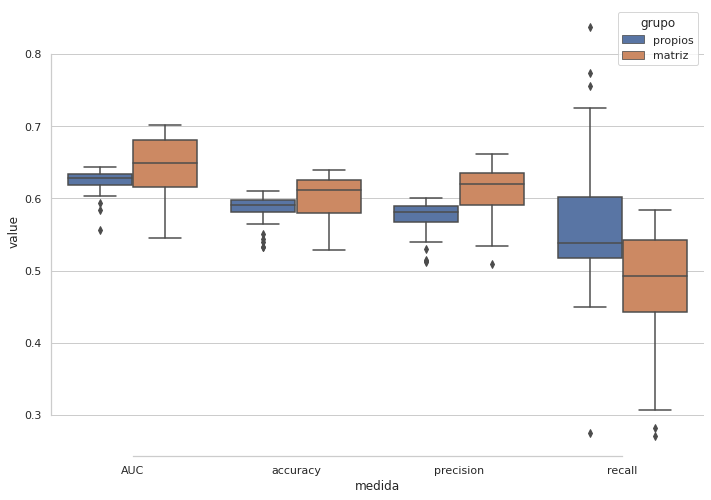

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = (
    df[['grupo',	'AUC',	'accuracy',	'precision',	'recall']].set_index('grupo', append=True)  # set E as part of the index
      .stack()                      # pull A - D into rows 
      .to_frame()                   # convert to a dataframe
      .reset_index()                # make the index into reg. columns
      .rename(columns={'level_2': 'medida', 0: 'value'})  # rename columns
      .drop('level_0', axis='columns')   # drop junk columns
      .pipe((sns.boxplot, 'data'), x='medida', y='value', hue='grupo')
)
sns.axes_style("whitegrid")
sns.despine(trim=True)


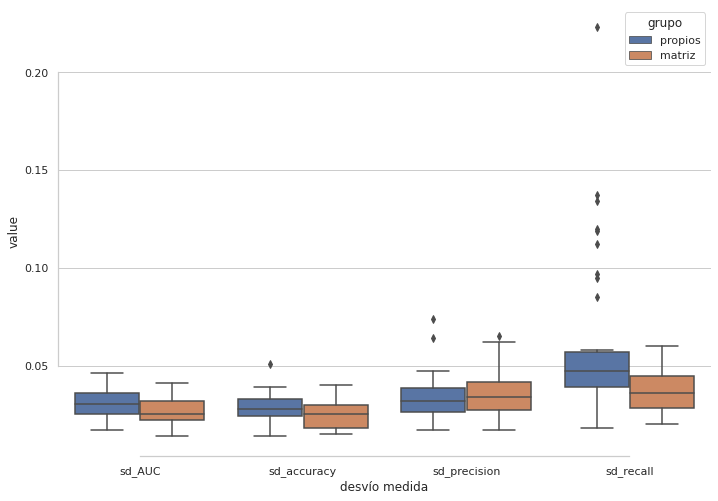

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = (
    df[['grupo',	'sd_AUC',	'sd_accuracy',	'sd_precision',	'sd_recall']].set_index('grupo', append=True)  # set E as part of the index
      .stack()                      # pull A - D into rows 
      .to_frame()                   # convert to a dataframe
      .reset_index()                # make the index into reg. columns
      .rename(columns={'level_2': 'desvío medida', 0: 'value'})  # rename columns
      .drop('level_0', axis='columns')   # drop junk columns
      .pipe((sns.boxplot, 'data'), x='desvío medida', y='value', hue='grupo')
)
sns.despine(trim=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


grupo
matriz     AxesSubplot(0.125,0.125;0.775x0.755)
propios    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

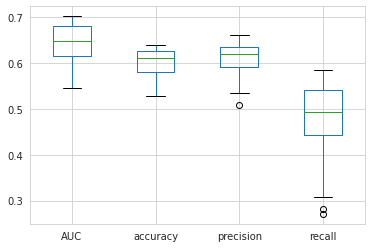

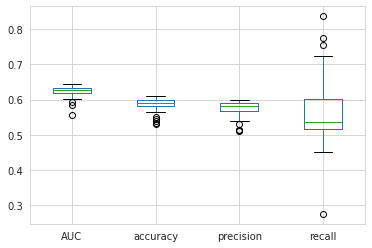

In [41]:
df.groupby('grupo')['AUC','accuracy','precision','recall'].plot(legend=True, kind='box')

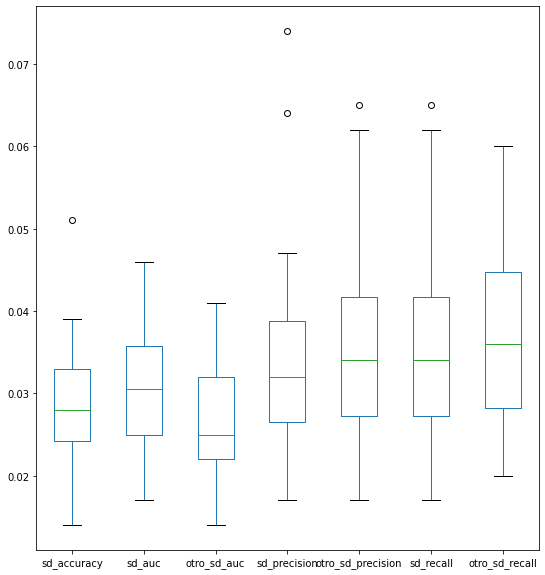

In [ ]:
df.boxplot(column=['sd_accuracy', 'sd_auc',	'otro_sd_auc', 'sd_precision',	'otro_sd_precision', 'sd_recall',	'otro_sd_recall'], grid=False,figsize=(9,10))

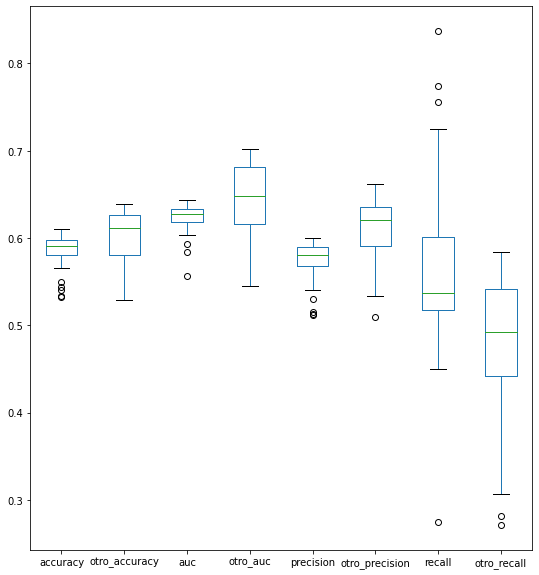

In [ ]:

df.boxplot(column=['accuracy', 'otro_accuracy', 'auc',	'otro_auc', 'precision',	'otro_precision', 'recall',	'otro_recall'], grid=False,figsize=(9,10))

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(y='lifeExp', x='continent', 
                 data=df1, 
                 palette="colorblind",
                 hue='year')